# Параметры успешной игры.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>

**Описание данных**<br>
*Name* — название игры<br>
*Platform* — платформа<br>
*Year_of_Release* — год выпуска<br>
*Genre* — жанр игры<br>
*NA_sales* — продажи в Северной Америке (миллионы проданных копий)<br>
*EU_sales* — продажи в Европе (миллионы проданных копий)<br>
*JP_sales* — продажи в Японии (миллионы проданных копий)<br>
*Other_sales* — продажи в других странах (миллионы проданных копий)<br>
*Critic_Score* — оценка критиков (максимум 100)<br>
*User_Score* — оценка пользователей (максимум 10)<br>
*Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>
Данные за 2016 год могут быть неполными.

## Изучение данных

In [1]:
#Импортируем все необходимые для работы библиотеки
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn

In [2]:
#устанавливаем опцию вывода всех колонок
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
#подсчитаем количество пропусков по столбцам
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
#сразу проверим на наличие дубликатов
data.duplicated().sum()

0

***Вывод***

В *Year_of_Releas* необходимо заменить тип данных на целочисленный, так как значении года нет дробной части.<br>
В *User_Score* также нужно заметить тип данных, но уже на float.<br>
Большое количество пропусков в столбцах *Critic_Score*, *User_Score* и *Rating*. Так же присутствуют в меньшем количестве пропуски в столбцах *Year_of_Release*, *Name* и *Genre*. Способы работы с пропусками будут расмотрены на следующем этапе.<br>
Дубликаты отсутсвуют.<br>
По описательным данным, можно увидеть, что данные берут свое начало с 1980 года. 

***

## Подготовка данных

*Приведем названия столбцов к нижнему регистру, заполним пропуски и преобразуем типы данных.*

In [8]:
data.columns = data.columns.str.lower()

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
data.loc[data['year_of_release'].isna()].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Заполнение пропусков в данном случае будет проблематично, так как тут не заполнить средним значением или модой, так как данные будут сильно искажены. Вручную заполнение могло бы быть возможным при наличии данных до выгрузки (что скорее всего и привело к пропускам - год должен быть у каждой игры, а значит это ошибка выгрузки), но так как пропущенных значений 269, то это так же займет много времени. Единственный вариант - это удалить строки с пропущенными значениями.

In [10]:
data.dropna(subset=['year_of_release'],inplace=True)
#заодно удалим два пропущенных значения в названии игр, так как их тоже нет возможности заполнить 
#какими-либо значениями и их удаление не повлияет на данные
data.dropna(subset=['name'],inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


После удаления оказалось, что отсутсвие названия игры совпадало с отсутсвием жанра

Теперь необходимо избавиться от пропусков в столбцах с рейтингом и оценкамим критиков и пользователей.<br>
В данных присутсвтует значение tbd - to be determined - подлежит определению и RP - рейтинг ожидается: означает, что оценки еще находятся на рассмотрении или рейтинг еще не проставлен. Такие значения было бы логично заменить на пропуски *NaN*, так как никакой конкретики такие данные нам не дадут. <br>
Непосредственные пропуски не получится заменить средними/модами/медианами, это будет некорректно, так же как и если удалить эти строки, так как их слишком много, составлять почти половину всех данных и удаление, ровно как и замена могут сильно исказить итоговый результат.<br>
Причина может быть на стороне источника данных ( у нас нет возможности обратиться к нему напрямую).<br>

Стоит рассмотреть, как появлялись пропуски со временем, чтобы подобрать верный способо работы с пропусками.

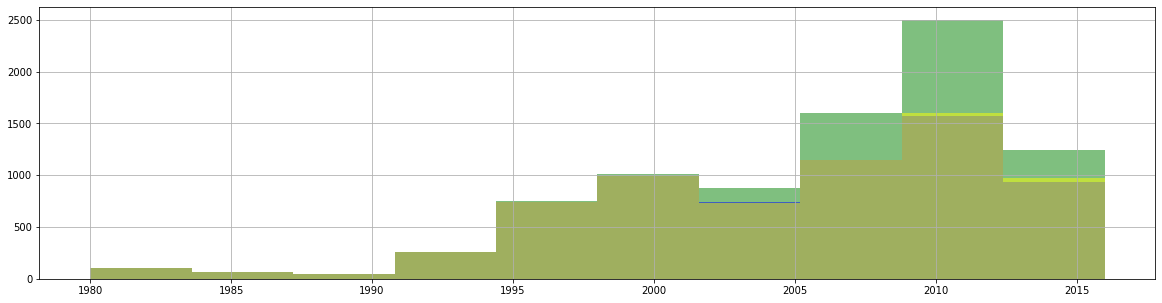

In [11]:
#построим диаграмму, чтобы было нагляднее представить данные 
fig, ax = plt.subplots(figsize=[20,5])
data.loc[data['critic_score'].isna(),'year_of_release'].hist(alpha=0.5,color='green')

data.loc[data['user_score'].isna(),'year_of_release'].hist(alpha=0.5, color='blue')

data.loc[data['rating'].isna(),'year_of_release'].hist(alpha=0.5, color='yellow')

plt.show()

Что примечательно, рейтинг и оценка пользователей сливаются на графике (если заккоментировать одну из этих строк - будет видно, оба вида данных отображены, просто цвета накладываются один на другой). Это означает, что ретинг отсутсвует в тех же строках, где отсутсвует оценка пользователей.<br>
Больше всего отсутсвующих значений у игр после 2005 года. Это можно объяснить несколькими вариантами:<br>
- развивается индустрия игр, системные требования становятся выше, не у всех есть возможность приобрести "железо", которое соответствовало бы и следовательно мало пользователей играют в них, а из той выборки прошедших игру не оценили ее;<br>
- кол-во выпускаемых игр увеличивается и кол-во неоцененных игр так же увеличивается пропорционально;<br>
- возможно особенности рейтинговой системы, что должно пройти время (кол-во лет) после выпуска игры и получено определенное кол-во оценок для формирования общей оценки игры (в связи с этим так же могут появлятся значениям tbd и RP).<br>

Все равно у нас отсутствует способ решения проблемы пропусков, поэтому оставим как есть, а при анализе на основании рейтинга будем использовать только строки с заполненными значениями.

In [12]:
#вернемся к значениям tbd и RP, поменяем их значения на пропуски NaN
data.loc[data['user_score']=='tbd', 'user_score'] = np.nan

data.loc[data['rating']=='RP', 'rating'] = np.nan

In [13]:
#теперь перейдем к смене типа данных 
#year_of_release меняем тип данных на int, так как значении года нет дробной части
#user_score заметить тип данных на float

data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9767 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


***

*Посчитаем суммарные продажи во всех регионах и добавим их отдельным столбцом sum_sales*

In [14]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Данные подготовленные для исследовательского анализа: названия столбцов приведены к нижнему регистру, проведена работа с пропусками, проведена замена типов данных, добавлен столбец с суммарными значениями продаж по регионам.

***

## Исследовательский анализ

*Изучим кол-во выпускаемых игр в разные года, вместе с этим рассмотрим динамику по платформам. Применим метод pivot_table.*

In [15]:
years_pivot_table = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
years_pivot_table.head(10)

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


In [16]:
#динамика продаж по платформам
platform_pivot_table = (
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)
platform_pivot_table.head(15)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [17]:
#посчитаем срок жизни каждой платформы, годы ее происхождения
platform_list = data['platform'].unique().tolist()

game = []
first_year = []
for platform in platform_list:
    lifetime = len(data.loc[data['platform'] == platform,'year_of_release'].unique())
    year = data.loc[data['platform'] == platform,'year_of_release'].min()
    game.append(lifetime)
    first_year.append(year)
    
platform_list = pd.Series(platform_list, name='platform')
game = pd.Series(game, name='lifetime')
first_year = pd.Series(first_year, name='first_year')

platforms_lifetime = pd.concat([platform_list, game, first_year],axis=1)

platforms_lifetime = platforms_lifetime.sort_values(by='lifetime')
platforms_lifetime.head()

,platform,lifetime,first_year
30,PCFX,1,1996
27,TG16,1,1995
29,GG,1,1992
28,3DO,2,1994
24,SCD,2,1993


In [18]:
#считаем средний срок продолжительности жизни платформ
avg_platform_lifetime = platforms_lifetime['lifetime'].mean()
print('Средний срок жизни платформы {:.2} лет'.format(avg_platform_lifetime))

Средний срок жизни платформы 7.7 лет


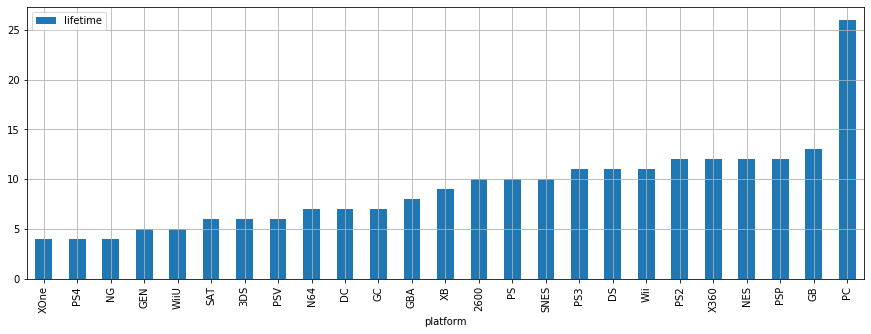

In [19]:
#с помощью графика получим более точные цифры
(
    platforms_lifetime.query('lifetime>3').plot(kind='bar', 
                                                x='platform', y='lifetime', 
                                                figsize=(15,5), grid=True)
)

In [20]:
#уберем из расчета ПК, так как это "вечная" платформа 
#так же можно убрать и все еще актуальные платформы
exclude = ['PC', 'XOne', 'PS4', '3DS', 'WiiU', 'PSV']
avg_platform_lifetime = platforms_lifetime \
    .loc[~platforms_lifetime['platform'].isin(exclude),'lifetime'].mean()
print('Средний срок жизни платформы {:.2} лет'.format(avg_platform_lifetime))

Средний срок жизни платформы 7.5 лет


Разницы практически нет, следовательно нужно попробовать разделить платформы на периоды, чтобы еще точнее посчитать продолжительность.

In [21]:
#разделим на тысячилетия ( до 2000го и после 2000го года)

avg_platform_lifetime = platforms_lifetime.query('first_year < 2000') \
    .loc[~platforms_lifetime['platform'].isin(exclude), 'lifetime'].mean()
print('Средний срок жизни платформы выпущенной до 2000 - {:.2f} лет'.format(avg_platform_lifetime))

avg_platform_lifetime = platforms_lifetime.query('first_year >= 2000') \
    .loc[~platforms_lifetime['platform'].isin(exclude), 'lifetime'].mean()
print('Средний срок жизни платформы выпущенной после 2000 - {} лет'.format(avg_platform_lifetime))

Средний срок жизни платформы выпущенной до 2000 - 6.18 лет
Средний срок жизни платформы выпущенной после 2000 - 10.25 лет


Видно, что со временем платформы стали дольше жить. Разница почти 4 года в значениях. 

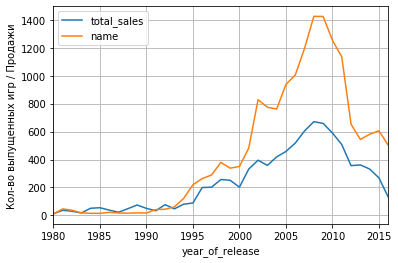

In [22]:
#представим графически данные о продажах и кол-ве релизов по годам
data.groupby('year_of_release')['total_sales'].sum().plot(legend=True)
data.groupby('year_of_release')['name'].count().plot(legend=True, grid=True)
plt.ylabel('Кол-во выпущенных игр / Продажи')
plt.show()

Несмотря на резкий рост выпуска игр в начале 2000х, выручка от продаж не имеет настолько резкие скачки. После 2010 года наблюдается такой же резкий спад как по релизам, так и по продажам. Возможно это обуславливается тем, что индустрия игр начала активно развиваться и выпускать больше новых игр, чем быстро создала перенасыщение рынка.

***

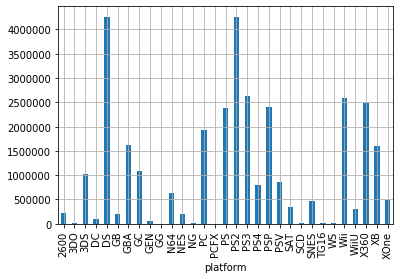

In [23]:
#изучим наибольшие продажи по платформам
(
    data.groupby('platform')['year_of_release'].sum()
    .plot(kind='bar',x='platform', y='total_sales', grid=True)
)

Если брать данные за все время (с 1980 года), то большая часть продаж пришлась на DS, PS2, PS3, Wii и X360. <br>
Для корректного анализа нужен срез данных с более актуальными значениями, так как не смотря на свой пик продаж DS и PS2 уже устаревшие платформы, а значит судить по ним было бы неверным решением.<br>

Можно взять срез с 2012 года, опираясь на ранее полученные данные, так как примерно в это время продажи пошли на спад, а количество игр станет более менее одинаковым по годам и появятся в выборке наиболее популярные платформы на данный момент.

In [24]:
data_games_2012 = data.query('year_of_release >= 2012')

#попробуем новый метод crosstab()
pd.crosstab(data_games_2012['platform'], data_games_2012['year_of_release'],
            values=data_games_2012['total_sales'], aggfunc='sum',
            margins=True, margins_name="total").sort_values(by='total', ascending=False)

year_of_release,2012,2013,2014,2015,2016,total
platform,,,,,,
total,355.84,361.24,331.53,267.98,129.94,1446.53
PS4,NaN,25.99,100.00,118.90,69.25,314.14
PS3,107.36,113.25,47.76,16.82,3.60,288.79
X360,99.74,88.58,34.74,11.96,1.52,236.54
3DS,51.36,56.57,43.76,27.78,15.14,194.61
XOne,NaN,18.96,54.07,60.14,26.15,159.32
WiiU,17.56,21.65,22.03,16.35,4.60,82.19
PC,23.22,12.38,13.28,8.52,5.25,62.65
PSV,16.19,10.59,11.90,6.25,4.25,49.18


Исходя из полученного среза можно сделать следющие выводы:<br>
 - PS4 появилась в 2013 году и к 2016 году стала лидером по продажам;
 - PS3 заметно потеряло в позициях к 2016 году в продажах, но тем не менее смогла остаться на втором месте;
 - X360 так же стало стремительно отставать по продажам после выхода приставки нового поколения PS4;
 - XOne прямой конкурент PS4, очевидно проигрывает по цифрам, но тем не менее видно, что продажи росли до 2015 года, затем пошли на спад;
 - стоит отметить платформу 3DS, единственная портативная консоль в топ5, но продажи так же уменьшаются.<br>
 
Делаем вывод, что за последние несколько лет продажи растут или хотя бы сохраняются у PS4 и XOne, в то время как на остальные прожади стремительно подают. Возможно, это связано с тем, что на старые консоли перестают выпускать игры.

*Необходимо отдельно рассмотреть количество выпускаемых игр*

In [25]:
pd.crosstab(data_games_2012['platform'], data_games_2012['year_of_release'],
            margins=True, margins_name="total").sort_values(by='total', ascending=False)

year_of_release,2012,2013,2014,2015,2016,total
platform,,,,,,
total,653,544,581,606,502,2886
PS3,148,126,108,73,38,493
PSV,53,63,100,110,85,411
3DS,93,91,80,86,46,396
PS4,0,16,75,137,164,392
X360,106,75,63,35,13,292
PC,61,38,47,50,54,250
XOne,0,19,61,80,87,247
PSP,106,54,10,3,0,173


На старые поколения платформ, действительно, со временем выпускают все меньше игр, в это же время на новые платформы кол-во игр растет. У платформы PSV игры выпускаются с каждым годом все больше, но продажи ее падают.

Потенциально прибыльные плаформы - платформы нового поколения (PS4, XOne и 3DS, как лидер портивных консолей): на них выпускается все больше игр и они принесли больше всего выручки в 2015/16 годах.

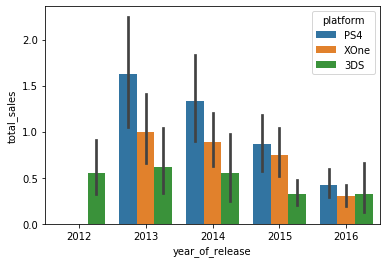

In [26]:
profit_platform = ['PS4','XOne','3DS']

seaborn.barplot(y='total_sales', 
            x='year_of_release', 
            hue='platform', 
            data = data_games_2012.query('platform in @profit_platform'),
            hue_order=profit_platform)
plt.show()

На графике заметен тот самый тренд сокращение доходов всей игровой индустрии. На PS4 это сказалось сильнее всего.

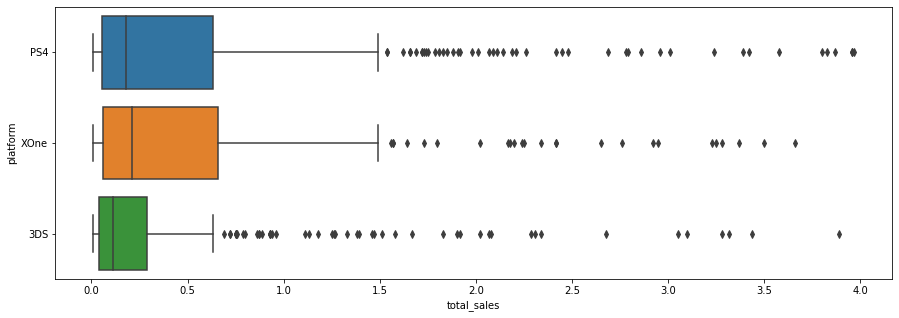

In [27]:
#построим диаграмму размаха по глобальным продажам выбранных платформ
#стоит поставить ограничение до 4х млн долларов, для более удобного восприятия графика
plt.figure(figsize=(15,5))
seaborn.boxplot(y='platform', x='total_sales',
            data = data_games_2012.query('platform in @profit_platform and total_sales < 4')
            ,order=profit_platform)
plt.show()

Продажи PS4 и XOne очень похожи между собой: возможно это потому, что игры одновременно выпускают на обе платформы. В лидеры по выручке PS4 выводят эксклюзивы, которые чаще выпускают Sony. Но график нам показывает, что разброс по выручке примерно одинаковый. Что касается 3DS, то разброс цен почти в 2 раза меньше, что нам дает понять, что данная портативная консоль сильно уступает стационарным.

***

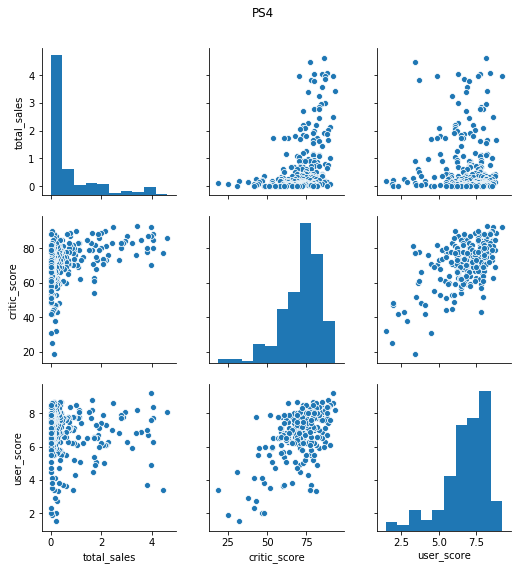

In [28]:
#необходимо изучит***ь влияние критиков и пользователей на продажи игр на PS4
#создадим отдельны DF: уберем данные с пропусками и увеличим ограничение до 5 млн

data_ps4 = data_games_2012.loc[(data_games_2012['total_sales'] <5) 
                               & (data_games_2012['platform']=='PS4') 
                               & (data_games_2012['critic_score'].notna()) 
                               & (data_games_2012['user_score'].notna())]

#построим матрицу
j = seaborn.pairplot(data_ps4[['total_sales','critic_score', 'user_score']])
j.fig.suptitle('PS4', y= 1.05)
plt.show()

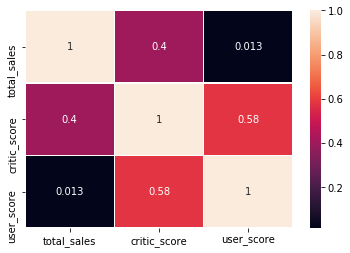

In [29]:
#добавим heatmap
seaborn.heatmap(data_ps4[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)

- Существует умеренная зависимость между отзывами критиков и продажами, заметно что у значительной части игр с большими продажами нормальные/хорошие отзывы. Плохих отзывов критиков у прибыльных проектов - нет. Крупные и дорогие проекты вкладывают большие деньги в продвижение, что в том числе это может влиять на оценки критиков.

- Оценки пользователей демонстрируют около нулевую корреляцию, и на диаграмме рассеяния сложно отметить какие-либо тенденции. Вероятно пользователи более критичны в отношении игр. Так как даже у очень успешных в финансовом плане проектов есть плохие оценки пользователей.

- Стоит заметить, что оценки пользователей имеют среднюю корреляцию с оценками критиков (это ярко видно на графике). То есть, не редки случаи, когда оценки пользователейи критиков совпадают, либо находятся рядом друг с другом.

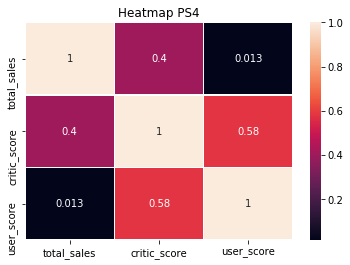

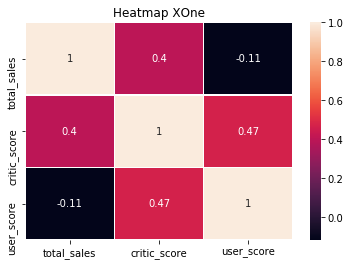

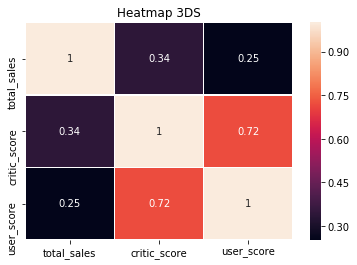

In [30]:
#сравним корреляции с другими платформами
data_xone = data_games_2012.loc[(data_games_2012['total_sales'] <5) 
                               & (data_games_2012['platform']=='XOne') 
                               & (data_games_2012['critic_score'].notna()) 
                               & (data_games_2012['user_score'].notna())]

data_3ds = data_games_2012.loc[(data_games_2012['total_sales'] <5) 
                               & (data_games_2012['platform']=='3DS') 
                               & (data_games_2012['critic_score'].notna()) 
                               & (data_games_2012['user_score'].notna())]
seaborn.heatmap(data_ps4[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('Heatmap PS4')
plt.show()
seaborn.heatmap(data_xone[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('Heatmap XOne')
plt.show()
seaborn.heatmap(data_3ds[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('Heatmap 3DS')
plt.show()

Как и ранее было отмечено, PS4 и XOne похожи, коэффициенты корреляции так же очень схожи.<br>
3DS следует рассмотреть подробнее, так как здесь более выражена зависимость продаж от оценок пользователей, а так же достаточно высокая корреляция оценок пользователей и критиков.

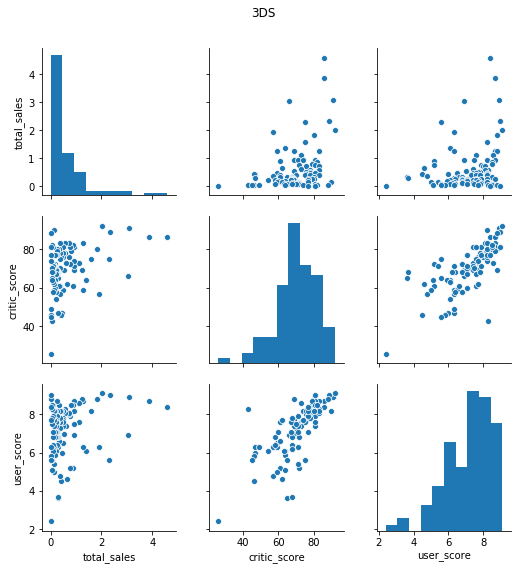

In [31]:
j = seaborn.pairplot(data_3ds[['total_sales','critic_score', 'user_score']])
j.fig.suptitle("3DS", y=1.05)
plt.show()

Действительно, на графике заметно, что оценки критиков и пользователей часто совпадают.

***

In [32]:
#изучим распределение игр по жанрам
#определим самый прибыльный
(
    data_games_2012
    .pivot_table(index='genre',columns='year_of_release'
                 ,values='total_sales',aggfunc='sum',margins=True,margins_name='total')
    .sort_values(by='total', ascending=False)
)

year_of_release,2012,2013,2014,2015,2016,total
genre,,,,,,
total,355.84,361.24,331.53,267.98,129.94,1446.53
Action,119.25,122.51,97.23,72.02,30.11,441.12
Shooter,71.75,62.04,65.21,67.51,38.22,304.73
Role-Playing,46.91,44.45,45.62,37.64,18.18,192.80
Sports,30.42,41.17,45.15,40.84,23.49,181.07
Misc,22.22,25.27,23.38,11.57,2.60,85.04
Platform,18.37,24.54,8.81,6.05,3.23,61.00
Racing,13.61,12.37,16.66,8.07,2.79,53.50
Fighting,9.18,7.09,15.85,7.90,4.47,44.49


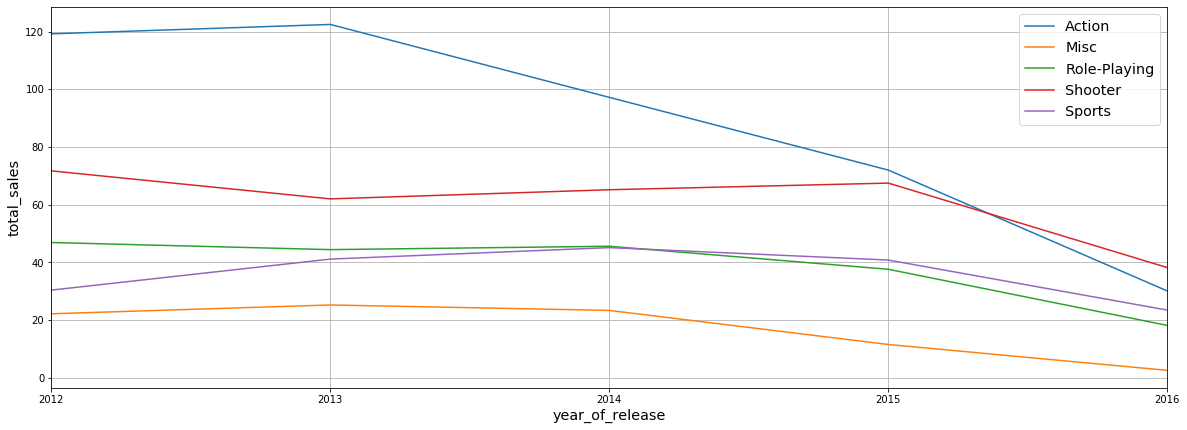

In [33]:
#строим график по пяти самым прибыльным жанрам
#все жанры нам нет смысла использовать, так как выбирать все равно будем один
genre_top = ['Action', 'Shooter', 'Role-Playing', 'Sports','Misc']

#составляем ту же таблицу, без общего подсчета и только по выбранным жанрам
sales_genre = (
    data_games_2012.query('genre in @genre_top')
    .pivot_table(index='genre',columns='year_of_release'
                 ,values='total_sales',aggfunc='sum')
)

#создадим список для значений по оси х
x = data_games_2012['year_of_release'].unique()

fig, ax = plt.subplots(figsize=(20,7))
sales_genre.T.plot(kind='line',  ax=ax, grid=True, xticks=x)
plt.ylabel('total_sales',fontsize='x-large')
plt.xlabel('year_of_release',fontsize='x-large')
plt.legend(fontsize='x-large')
plt.show()

На первый взгляд может казаться, что жанр Action в топе, но на графике четко видно, что с 2013 года он испытывает значительное падение, в то время как остальные жарны более менее находятся в одном положении (за 2016 год данные не полные, поэтому у всех жанров в этот период падение). <br>
Следовательно на данный момент лидером среди жанров на рынке является Shooter.

***

***Общий вывод***

В 90х начался значительный рост в игровой индустрии, который достиг своего пика в 2005-7 годах. Но к 2016 году релизы и выручка снизились практически до уровня конца 90х.

Скорость устаревания платформ прошлого тысячелетия от 4 до 7 лет, в то время как консоли нового поколения остаются актуальными до 10 лет.

Самые прибыльные платорфмы с 1980 года, с порядке убывания популярнсти: PS2, X360, PS3, Wii и DS На промежутке с 2012 года - PS4, PS3, X360, 3DS, XOne. Из них наиболее перспективные - PS4, XOne и 3DS.

Диаграмма размаха продемонстрировала, что в большинстве игры на PS4 & XOne продаются одинаково. Графики размаха почти идентичны, за исключением выбросов. На PS4 выходит больше экслюзивов.

Существует умеренная зависимость между оценками критиков и продажами. Критики как правило более благосклонны к играм. В то время как зависимость между отзывами пользователей и продажами почти не прослеживается. Пользователи более критичны в своих оценках. Однако, оценки пользователей и критиков выставляются примерно в одном направлении. Если игра имееют отличную оценку от критиков, то с большей вероятностью можно сказать что и от пользователей оценка будет как минимум нормальная.

Самый прибыльный жанр с 2012 года - Shooter, за ним Sports & Role-Plaing, далее Action занимает третье место и замыкает Misc.

***

## Портрет регионов

    Составим портрет пользователя в каждом регионе: Северная Америка, Европа, Япония.<br>
Определим:
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

***

***Северная Америка***

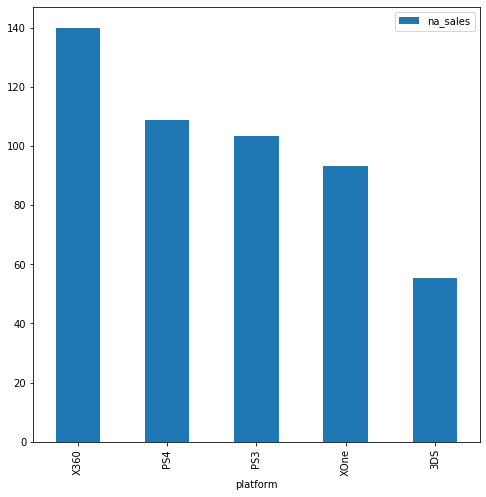

In [39]:
#выделим топ-5 популярных плаформ

data_games_2012.pivot_table(index='platform', values='na_sales', aggfunc='sum'
                    ).sort_values('na_sales', ascending=False).head(5
                    ).plot(kind='bar', figsize=(8,8))

В продажах лидирует консоль от Microsoft (XOne), но платформы от Sony не сильно отстают и находятся почти на одном уровне друг с другом. 3DS так же попадает в топ-5 лидеров среди платформ, пусть и на последнем месте.

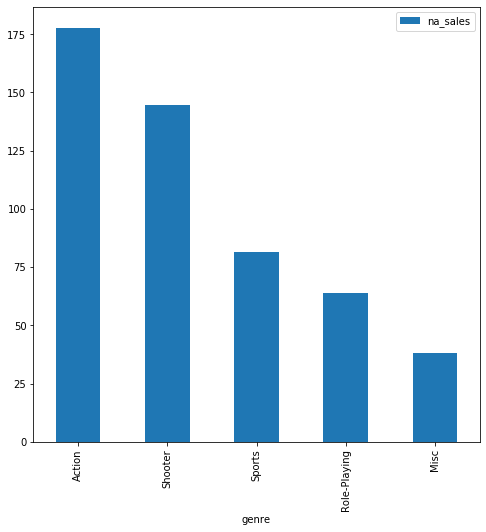

In [40]:
#выделим топ-5 жанров

data_games_2012.pivot_table(index='genre', values='na_sales', aggfunc='sum'
                    ).sort_values('na_sales', ascending=False).head(5
                    ).plot(kind='bar', figsize=(8,8))

Жанр Action занимает лидирующие позиции, но стоит проверить динамику, так как в предыдущем исследовании общих продаж этот жанр сдает свои позиции

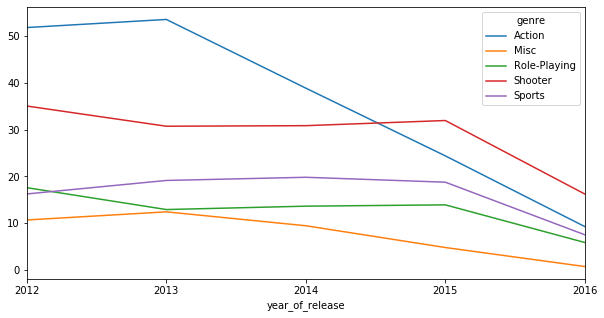

In [42]:
data_games_2012_top_genre = data_games_2012.query('genre in ["Action","Shooter","Sports","Role-Playing","Misc"]')
fig, ax = plt.subplots(figsize=(10,5))
pd.crosstab(data_games_2012_top_genre['genre'], 
            data_games_2012_top_genre['year_of_release'],
            values=data_games_2012_top_genre['na_sales'],
            aggfunc='sum').T.plot(ax = ax, xticks=x)

plt.show()

Как и было отмечено ранее, жанр Action успает позиции лидера Shooter, но не скатывается на последние позиции, а остается на втором месте. В топ-5 жанров попали те же, что и во всем мире. 

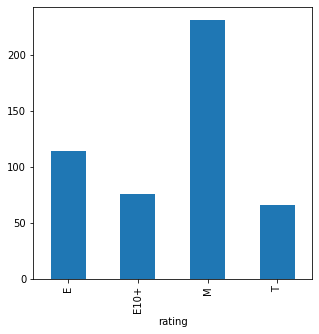

In [46]:
#влияние рейтинга ESRB на продажи

fig, axs = plt.subplots(1, figsize=(5,5))
data_games_2012.groupby('rating')['na_sales'].sum().plot(kind='bar')

Наибольшим спросом пользуются игры с рейтингом М (для взрослых) : эти игры, как правило, с незацензуренными сценами жестокости, насилия, некоторые сцены носят сексуальный характер, а так как это все недопустимо для молодого потребителя (младше 17 лет), то и желание сыграть гораздо выше, чем в детские/подростковые игры.

***

***Европа***

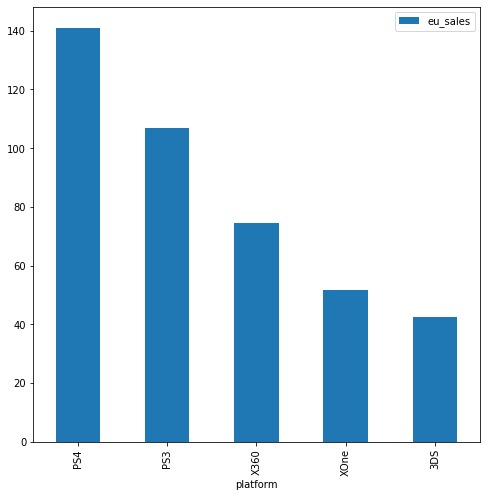

In [48]:
#выделим топ-5 популярных плаформ

data_games_2012.pivot_table(index='platform', values='eu_sales', aggfunc='sum'
                    ).sort_values('eu_sales', ascending=False).head(5
                    ).plot(kind='bar', figsize=(8,8))

В Европе ситуция немного обстоит иначе с платформами: в лидеры выбивается Sony (PS4 и PS3), XBox же занимают последние позиции. С 3DS показатели такие же как в Северной Америке.

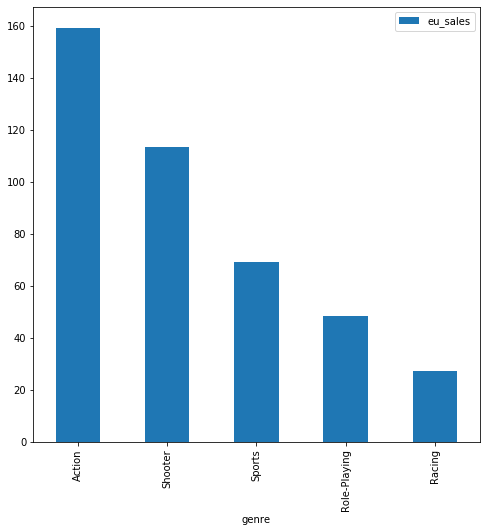

In [49]:
#выделим топ-5 жанров

data_games_2012.pivot_table(index='genre', values='eu_sales', aggfunc='sum'
                    ).sort_values('eu_sales', ascending=False).head(5
                    ).plot(kind='bar', figsize=(8,8))

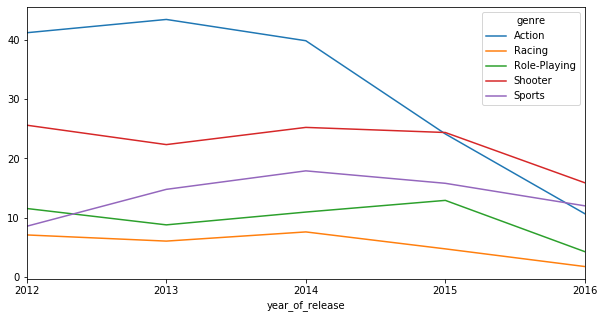

In [50]:
data_games_2012_top_genre = data_games_2012.query('genre in ["Action","Shooter","Sports","Role-Playing","Racing"]')
fig, ax = plt.subplots(figsize=(10,5))
pd.crosstab(data_games_2012_top_genre['genre'], 
            data_games_2012_top_genre['year_of_release'],
            values=data_games_2012_top_genre['eu_sales'],
            aggfunc='sum').T.plot(ax = ax, xticks=x)

plt.show()

У Европейских пользователей примерно такие же предпочтения как и в Северной Америке, за исключением последнего вида жанра (вместо Misc позицию занимает Racing). И так же как и везде Action занимал какое-то время лидирующие позиции, но со временем уступил жанру Shooter и даже Sports. Это может быть связано, что в этом жанре стали меньше выпускать игр, отдавая другим жанрам предпочтение.

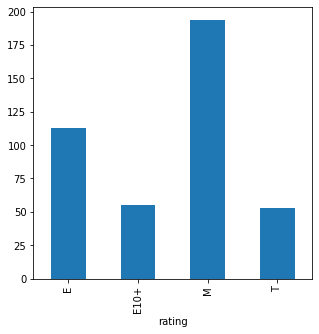

In [51]:
#влияние рейтинга ESRB на продажи

fig, axs = plt.subplots(1, figsize=(5,5))
data_games_2012.groupby('rating')['eu_sales'].sum().plot(kind='bar')

Ситуация такая же как в Северной Америке: популярны игры с рейтингом M (для взрослых). Да и остальные показатали примерно такие же.

***

***Япония***

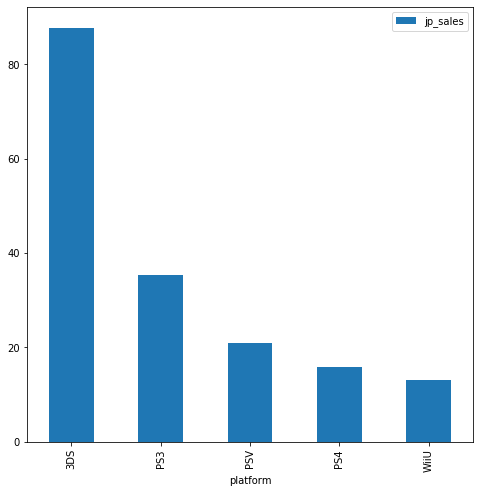

In [56]:
#выделим топ-5 популярных платформ

data_games_2012.pivot_table(index='platform', values='jp_sales', aggfunc='sum'
                    ).sort_values('jp_sales', ascending=False).head(5
                    ).plot(kind='bar', figsize=(8,8))

В Японии все совсем переигралось: самым популярным является портативная консоль 3DS (скорее всего потому, что подростки не расстаются с гаджетами и предпочитают играть везде, где эо только возможно, а так же у японцев настолько активный образ жизни и столько работы, что расслабиться за игрой, видимо, есть возможность только на ходу).<br>
XBox вообще не фигурирует в топ-5, но зато Sony попало в пятерку лидеров и даже занимает не послежние позиции, однако PS3 опережает PS4 на целых два пункт, хотя во всем остальном мире с точностью наоборот. 

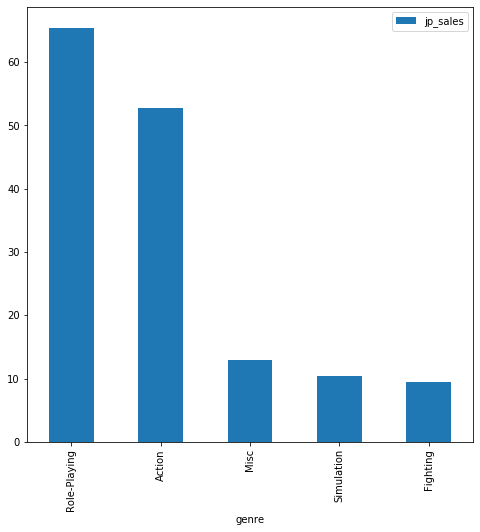

In [53]:
#выделим топ-5 жанров

data_games_2012.pivot_table(index='genre', values='jp_sales', aggfunc='sum'
                    ).sort_values('jp_sales', ascending=False).head(5
                    ).plot(kind='bar', figsize=(8,8))

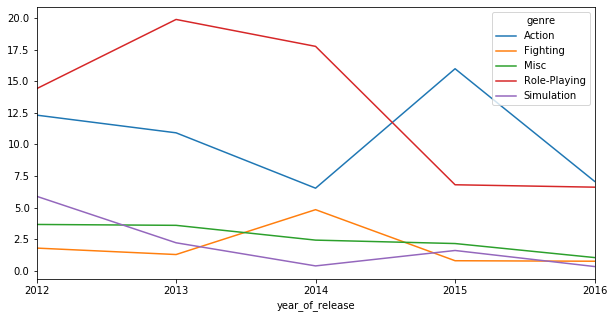

In [59]:
data_games_2012_top_genre = data_games_2012.query('genre in ["Role-Playing", "Action", "Misc", "Simulation","Fighting"]')
fig, ax = plt.subplots(figsize=(10,5))
pd.crosstab(data_games_2012_top_genre['genre'], 
            data_games_2012_top_genre['year_of_release'],
            values=data_games_2012_top_genre['jp_sales'],
            aggfunc='sum').T.plot(ax = ax, xticks=x)

plt.show()

В жанрах игроки Японии тоже смогли отличиться: RPG и Action борются за первое место, но все таки RPG остается более популярным, не смотря на всплески Action в динамике по годам. Примечательно, что кроме RPG и Action, Япония не сопадает со всем остальным миром. Misc, Simulation и Fighting занимают приблизительно одинаковые позиции на протяжении всего времени.

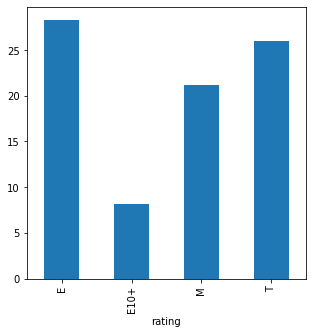

In [55]:
#влияние рейтинга ESRB на продажи

fig, axs = plt.subplots(1, figsize=(5,5))
data_games_2012.groupby('rating')['jp_sales'].sum().plot(kind='bar')

Как уже понятно из предыдущих двух показатей, то Япония существенно отличается от всего остального мира: игры для всех (E), подростков (T) и взрослых (M) находятся на почти одинаковом пике популярности, хотя даже игры для всех (E) выбиваются в лидеры - видимо популярность как раз таки в общей доступности. (Тут вполне вероятно играет дисциплина, так как Япония одна из самых дисциплинированных и "воспитанных" стран, то навряд ли дети/подростки будут пытаться играть в недозволенные игры)

***

***Общий вывод***

По итогу мы имеем, что по своим показателям Северная Америка и Европа схожи: они отдают предпочтение классическим консолям и поддерживают производителей Microsoft и Sony, немного различаясь в лидерах, но в целом набор лидирующих платформ одинаковый. Различия могут быть из-за ценовой политики разных стран, рекламных кампаний и прочее. Но историческое противостояние XBox и PS имеет место быть, при чем PS зачастую выигрывает за счет большего кол-ва эксклюзивных игр. <br>
В жанрах и влиянии рейтинга ESRB же они почти полностью копируют друг друга, даже практически повторяют общую динамику.(Кроме последнего места в жанрах: Северная Америка -  Misc, Европа - Racing)

Что же касается Японии, то это регион тотально отличается от первых друх рассматриваемых. Местные пользователи предпочитают портативность стационарным консолям и полностью поддерживают отечетсвенного производителя. В жанрах игроки вывели в топ-5 абсолютно другие, достаточно характерные для стериотипного пользователя Японии. Рейтинг же, как было сказано выше, почти равен между собой, в то время как в Северной Америке и Европе преобладают только игры с рейтингом M (для взрослых).

***

## Проверка гипотез

*Нам необходимо проверить две гипотезы:*
- *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;*
- *Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

*Обе гипотезы подразумевают сравнение средних значений двух независимых выборок. Поэтому воспользуемся t-критерием Стьюдента.*

***

Начнем с первой гипотезы: 
- H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1 - Средние пользовательские рейтинги платформ Xbox One и PC различаются

**Пороговое значение alpha зададим 5%**

In [91]:
xbox = data_games_2012.loc[(data_games_2012['platform'] == 'XOne') & (data_games_2012['user_score'].notna())]
xbox_user_score = xbox['user_score'].tolist()
pc = data_games_2012.loc[(data_games_2012['platform'] == 'PC') & (data_games_2012['user_score'].notna())]
pc_user_score = pc['user_score'].tolist()


alpha = 0.05

result = st.ttest_ind(xbox_user_score,pc_user_score)

print('p-value - ', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу отвергнуть не удалось')

p-value -  0.5535080500643661
Нулевую гипотезу отвергнуть не удалось


Уровень p-значимости больше заданого порогового значения (5%), что означает, что мы **не можем отвергнуть нулевую гипотезу о равенстве среднего пользовательского рейтинга платформ Xbox One и PC**

***

Проверяем вторую гипотезу: 
- H0 - Средние пользовательские рейтинги жанров Action и Sports равны
- H1 - Средние пользовательские рейтинги жанров Action и Sports различаются

(нам необходимо проверить именно сам факт различия, который мы взяли за альтернативную гипотезу H1, так как нулевая гипотеза H0 всегда идет со знаком равенства)

**Пороговое значение alpha зададим 5%**

In [92]:
action = data_games_2012.loc[(data_games_2012['genre'] == 'Action') & (data_games_2012['user_score'].notna())]
sports = data_games_2012.loc[(data_games_2012['genre'] == 'Sports') & (data_games_2012['user_score'].notna())]
action_user_score = action['user_score'].tolist()
sports_user_score = sports['user_score'].tolist()


alpha = 0.05

result = st.ttest_ind(action_user_score, sports_user_score)

print('p-value - ', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу отвергнуть не удалось')

p-value -  3.7163089460934874e-26
Отвергаем нулевую гипотезу


Уровень p-значимости значительно меньше порогового значения (5%), что означает, что мы **принимает альтернативную гипотезу: о различии среднего пользовательского рейтинга жанров Action и Sports**

***

## Общий вывод

В ходе проделанной работы были обработаны и изученные данные по продажам игр с 1980 по 2016 год:
- обработаны пропуски, изменен тип данных в необходимых местах и названия колонок приведены к единому стилю (к нижнему регистру);
- посчитаны объемы продаж каждой игры;
- выявлено сокращение выпускаемых игр, а так же их продаж за последние 10 лет (продажы могут быть сокращены еще и за счет развивабщегося сервиса онлайн-игр и ежемесячных бесплатных или с очень большой скидкой игр по подписке);
- установили, что скорость устаревания платформы уменьшилась почти в 2 рада: в 20 веке платформы устаревали за 4-7 лет, платформы нового поколения "живут" до 10 лет;
- определены самые прибыльные платформы за все время - PS2, X360, PS3, Wii и DS;
- на данный момент существуют две лидирующие консоли: от Microsoft и от Sony;
- Sony в своей совокупности опережает Microsoft по продажам;
- рейтинг критиков у многих успешных игр был выско, в то время как пользовательский рейтинг почти не корелирует с продажами;
- установлено, что поведение игроков Северной Америки совпадает с поведением игроков Европы, особенно в отношении жанров, с небольшими, но не значительными расхожденями в платформах. Япония же отличается предпочтением к портативным консолям и жанрам, которые сильно отличаются от остального мира;
- после проверки гипотез установленно, что средние пользовательские рейтинги XBox One и PC практически не отличаются и средние пользовательские рейтинги жанров ACtion и Sports разные

На основании исследования соберем факторы, которые помогут определить коммерческий успех игры.  В ближайшем году нужно сфокусироваться на самых актуальных платформах - X-Box One, PS4 и 3DS. Топ-5 популярных жанров в мире - Action, Shooter, Sports, Role-Playing, Misc. Предпочтение следует отдавать играм с рейтингом M и высоким рейтингом критиков, такие игры чаще становятся кассовыми.

Однако стоит понимать, что для разных регионов должна быть выбрана разная стратегия, так как предпочтения пользователей все таки имеют значительные отличия, как например в Америке и Японии. Начиная от выбора платформы, заканчивая жанрами.